<a href="https://colab.research.google.com/github/edkambeu/loan_default_classification/blob/main/loan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading tensorflow 
import tensorflow as tf 


In [ ]:
#Checking tensorflow version 
print(tf.__version__)

2.12.0


In [ ]:
#Importing required libraries 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.compose import make_column_transformer
from sklearn import metrics 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers




In [ ]:
#Loading data
data = pd.read_csv("as1-bank.csv")

In [ ]:
#Shape of the data
print('Number of rows :',data.shape[0])
print('Number of columns :', data.shape[1])

Number of rows : 7842
Number of columns : 14


In [ ]:
#View the data 
data.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes


In [ ]:
#Describe the data 
data.describe()

,age,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,0.800179,1.206707,1552.343280,0.074598,261.290615,2.064269,223.252869,3.184264,0.626498
std,11.282964,0.621418,0.649716,3084.580003,0.262759,236.203272,1.566109,111.830127,4.614190,0.824863
min,18.000000,0.000000,0.000000,-1884.000000,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000
25%,32.000000,0.000000,1.000000,162.000000,0.000000,113.000000,1.000000,133.000000,1.000000,0.000000
50%,38.000000,1.000000,1.000000,595.000000,0.000000,194.000000,2.000000,195.000000,2.000000,0.000000
75%,47.000000,1.000000,2.000000,1733.750000,0.000000,324.000000,2.000000,326.000000,4.000000,1.000000
max,89.000000,2.000000,2.000000,81204.000000,1.000000,2219.000000,16.000000,871.000000,275.000000,2.000000


In [ ]:
#Check data types
print(data.dtypes)

age           int64
marital       int64
education     int64
default      object
balance       int64
housing      object
loan         object
contact       int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int64
y            object
dtype: object


In [ ]:
#Check for any missing values 
print(data.isna().sum())

age          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
#Extracting categorical features 
cat_columns = data.select_dtypes(include=['object']).columns
print(cat_columns)
#Extracting numerical features 
num_columns = data.select_dtypes(exclude =['object']).columns
print(num_columns)


Index(['default', 'housing', 'loan', 'y'], dtype='object')
Index(['age', 'marital', 'education', 'balance', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


In [ ]:
#Checking unique values of categorical columns 
for col in cat_columns:
  print(col, data[col].unique())

default ['no' 'yes']
housing ['no' 'yes']
loan ['no' 'yes']
y ['no' 'yes']


In [ ]:
#Proportion of yes  and no labels in the target feature 
total_yes = len(data[data['y'] == 'yes'])
total_no = len(data[data['y'] == 'no'])
total_yes_no = total_yes + total_no
prop_yes = total_yes / total_yes_no * 100
prop_no = total_no / total_yes_no * 100
prop_yes = len(data[data['y'] == 'yes'])/len(data) * 100
prop_no = len(data[data['y'] == 'no'])/ len(data) * 100 
print('Proportion of yes labels(%) :', prop_yes)
print('Proportion of no labels(%) :', prop_no)
print(total_no)
print(total_yes_no)


Proportion of yes labels(%) : 22.77480234634022
Proportion of no labels(%) : 77.22519765365978
6056
7842


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9b2b58f0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9b2b58f5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9b2b5e2ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9b2b58fb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9b2b58fdc0>],
 'means': []}

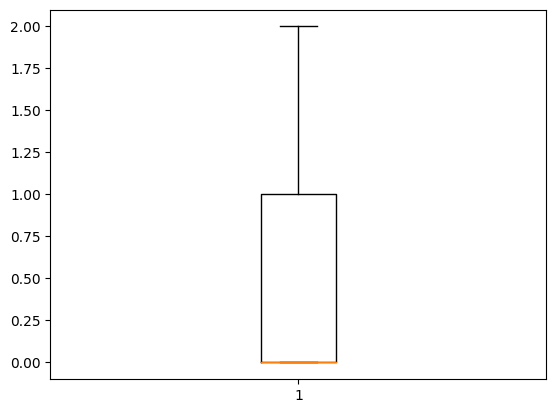

In [ ]:
#Check for outliers(plot box plots)
#plt.boxplot(data['age'])
plt.boxplot(data['poutcome'])

In [ ]:
#Split data into features and target 
X = data.drop(['y'], axis = 1)
y = data['y']

In [ ]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 1)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6273, 13) (1569, 13) (6273,) (1569,)


In [ ]:
cat_features = ['default', 'housing', 'loan']
X_train[cat_features].head()


,default,housing,loan
6248,no,no,no
6102,no,no,no
179,no,yes,no
2418,no,yes,no
4814,no,yes,no


In [ ]:

#Encoding categorical features
features_transformer = make_column_transformer([OneHotEncoder(),cat_features],
                                              [MinMaxScaler(), num_columns])

X_train_transformed = features_transformer.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = features_transformer.get_feature_names_out())
#X_train_transformed_df.head()
X_test_transformed = features_transformer. transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns = features_transformer.get_feature_names_out())
X_test_transformed_df.head()

,onehotencoder__default_no,onehotencoder__default_yes,onehotencoder__housing_no,onehotencoder__housing_yes,onehotencoder__loan_no,onehotencoder__loan_yes,minmaxscaler__age,minmaxscaler__marital,minmaxscaler__education,minmaxscaler__balance,minmaxscaler__contact,minmaxscaler__duration,minmaxscaler__campaign,minmaxscaler__pdays,minmaxscaler__previous,minmaxscaler__poutcome
0,1.0,0.0,0.0,1.0,1.0,0.0,0.098592,0.0,0.5,0.018210,0.0,0.065168,0.066667,0.419394,0.035088,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.112676,0.0,1.0,0.032640,0.0,0.069298,0.000000,0.240000,0.000000,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.549296,1.0,0.5,0.023601,0.0,0.074805,0.133333,0.296970,0.017544,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.154930,0.0,1.0,0.022903,0.0,0.120698,0.000000,0.105455,0.052632,0.5
4,1.0,0.0,1.0,0.0,0.0,1.0,0.507042,0.5,1.0,0.036263,0.0,0.108765,0.000000,0.221818,0.122807,0.0


In [ ]:
#Encoding the the target feature 
label_encoder = LabelEncoder()
y_train_transformed = label_encoder.fit_transform(y_train)
y_train_transformed_df = pd.DataFrame(y_train_transformed,columns = ['y'] )
#y_train_transformed_df.head()
y_test_transformed = label_encoder.transform(y_test)
y_test_transformed_df = pd.DataFrame(y_test_transformed, columns = ['y'])
#y_test_transformed_df.head()


In [ ]:
#Build the baseline model 
input_shape = len(X_train_transformed_df.columns)
model = keras.Sequential([layers.Dense(units = 24, input_shape = [input_shape] , activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units =16, activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units = 1, activation = 'sigmoid')])
#Compile the baseline model
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
#Fit the baseline model
early_stopping = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3) 
model.fit(X_train_transformed_df, y_train_transformed_df,
          validation_split = 0.20,
          epochs  = 50,
          batch_size = 100,
          callbacks = [early_stopping]
          )

Epoch 1/50
2/2 [==============================] - 2s 270ms/step - loss: 0.6575 - accuracy: 0.6347 - val_loss: 0.6080 - val_accuracy: 0.7394
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6399 - accuracy: 0.6532 - val_loss: 0.5992 - val_accuracy: 0.7506
Epoch 3/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6275 - accuracy: 0.6696 - val_loss: 0.5910 - val_accuracy: 0.7554
Epoch 4/50
2/2 [==============================] - 0s 56ms/step - loss: 0.6212 - accuracy: 0.6861 - val_loss: 0.5836 - val_accuracy: 0.7562
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.6169 - accuracy: 0.6885 - val_loss: 0.5769 - val_accuracy: 0.7554
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6064 - accuracy: 0.7011 - val_loss: 0.5709 - val_accuracy: 0.7554
Epoch 7/50
2/2 [==============================] - 0s 37ms/step - loss: 0.5954 - accuracy: 0.7166 - val_loss: 0.5651 - val_accuracy: 0.7546
Epoch 8/50
2/2 [==========

In [ ]:
history_df = pd.DataFrame(model.history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.657494,0.634715,0.608035,0.739442
1,0.639922,0.653248,0.599162,0.750598
2,0.627549,0.669589,0.591011,0.755378
3,0.621164,0.686130,0.583634,0.756175
4,0.616888,0.688521,0.576920,0.755378


<Axes: >

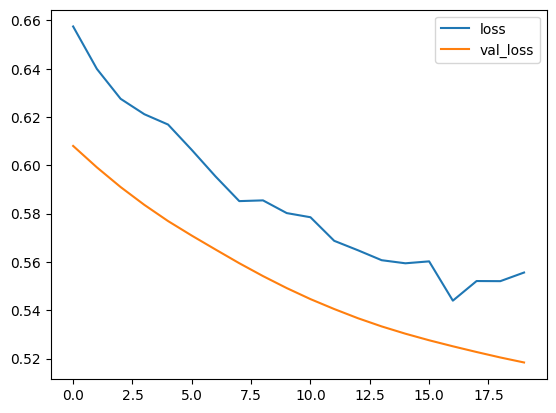

In [ ]:
history_df.loc[0: , ['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(X_test_transformed_df, y_test_transformed_df)

50/50 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7693


[0.51164311170578, 0.7692797780036926]

In [ ]:
#Making predictions 
y_predictions = np.argmax(model.predict(X_test_transformed_df), axis =1)
len(y_predictions)


50/50 [==============================] - 0s 2ms/step


1569

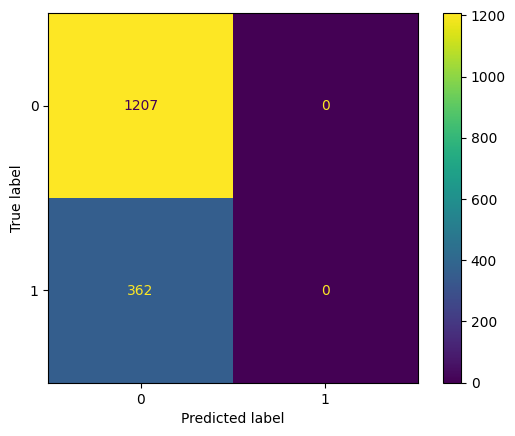

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#Confusion matrix
confusion_matrix = confusion_matrix(y_test_transformed_df, y_predictions)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
confusion_matrix_display.plot()
plt.show()

In [ ]:
accuracy_score = metrics.accuracy_score(y_test_transformed_df, y_predictions)
precision_score = metrics.precision_score(y_test_transformed_df, y_predictions)
sensitivity = metrics .recall_score(y_test_transformed_df, y_predictions, pos_label = 1)
specificity= metrics .recall_score(y_test_transformed_df, y_predictions, pos_label = 0)
f1_score = metrics.f1_score(y_test_transformed_df, y_predictions)
print('Accuracy score :', accuracy_score)
print('Precision score :', precision_score)
print('Sensitivity score :', sensitivity)
print('Specificity score :', specificity)
print('F1 score :', f1_score)






Accuracy score : 0.7692797960484385
Precision score : 0.0
Sensitivity score : 0.0
Specificity score : 1.0
F1 score : 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Setting initial and output bias 
initial_bias = np.log([prop_yes/prop_no])
#output_bias = keras.initializers.Constant(initial_bias) 
#Build the model
input_shape = len(X_train_transformed_df.columns)
model2 = keras.Sequential([layers.Dense(units = 24, input_shape = [input_shape] , activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units =16, activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units = 1, activation = 'sigmoid', bias_initializer = keras.initializers.Constant(initial_bias))])
#Compile the model
model2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fit the the model 
early_stopping = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3) 
model2.fit(X_train_transformed_df, y_train_transformed_df,
          validation_split = 0.20,
          epochs  = 500,
          batch_size = 100,
          callbacks = [early_stopping]
          )
#Evaluate the model
model2.evaluate(X_test_transformed_df, y_test_transformed_df) 
y_predictions2 = np.argmax(model2.predict(X_test_transformed_df), axis =1)
accuracy_score = metrics.accuracy_score(y_test_transformed_df, y_predictions2)
precision_score = metrics.precision_score(y_test_transformed_df, y_predictions2)
sensitivity = metrics .recall_score(y_test_transformed_df, y_predictions2, pos_label = 1)
specificity= metrics .recall_score(y_test_transformed_df, y_predictions2, pos_label = 0)
f1_score = metrics.f1_score(y_test_transformed_df, y_predictions2)
print('Accuracy score :', accuracy_score)
print('Precision score :', precision_score)
print('Sensitivity score :', sensitivity)
print('Specificity score :', specificity)
print('F1 score :', f1_score)


Epoch 1/500
51/51 [==============================] - 2s 7ms/step - loss: 0.5403 - accuracy: 0.7752 - val_loss: 0.5438 - val_accuracy: 0.7546
Epoch 2/500
51/51 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.7776 - val_loss: 0.5272 - val_accuracy: 0.7546
Epoch 3/500
51/51 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7776 - val_loss: 0.5121 - val_accuracy: 0.7546
Epoch 4/500
51/51 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7786 - val_loss: 0.4948 - val_accuracy: 0.7546
Epoch 5/500
51/51 [==============================] - 0s 3ms/step - loss: 0.4776 - accuracy: 0.7810 - val_loss: 0.4841 - val_accuracy: 0.7546
Epoch 6/500
51/51 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7806 - val_loss: 0.4791 - val_accuracy: 0.7546
Epoch 7/500
51/51 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7804 - val_loss: 0.4746 - val_accuracy: 0.7538
Epoch 8/500
5

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Using class weights 
weight_for_no = (1 / total_no) * (total_yes_no/2.0) 
weight_for_yes = (1 / total_yes) * (total_yes_no/ 2.0)
class_weight = {0: weight_for_no, 1: weight_for_yes}
print(class_weight)

{0: 0.6474570673712021, 1: 2.1954087346024638}


In [ ]:
##Intial bias + Class weights
initial_bias = np.log([prop_yes/prop_no])
#output_bias = keras.initializers.Constant(initial_bias) 
#Build the model
input_shape = len(X_train_transformed_df.columns)
model3 = keras.Sequential([layers.Dense(units = 24, input_shape = [input_shape] , activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units =16, activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units = 1, activation = 'sigmoid', bias_initializer = keras.initializers.Constant(initial_bias))])
#Compile the model
model3.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fit the the model 
early_stopping = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3) 
model3.fit(X_train_transformed_df, y_train_transformed_df,
          validation_split = 0.20,
          epochs  = 500,
          batch_size = 4000,
          callbacks = [early_stopping],
           class_weight = class_weight #Resetting class weight 
          )
#Evaluate the model
model3.evaluate(X_test_transformed_df, y_test_transformed_df) 
#Make predictions 
y_predictions3 = np.argmax(model3.predict(X_test_transformed_df), axis =1)
accuracy_score = metrics.accuracy_score(y_test_transformed_df, y_predictions3)
precision_score = metrics.precision_score(y_test_transformed_df, y_predictions3)
sensitivity = metrics .recall_score(y_test_transformed_df, y_predictions3, pos_label = 1)
specificity= metrics .recall_score(y_test_transformed_df, y_predictions3, pos_label = 0)
f1_score = metrics.f1_score(y_test_transformed_df, y_predictions3)
print('Accuracy score :', accuracy_score)
print('Precision score :', precision_score)
print('Sensitivity score :', sensitivity)
print('Specificity score :', specificity)
print('F1 score :', f1_score)



Epoch 1/500
2/2 [==============================] - 1s 257ms/step - loss: 1.0032 - accuracy: 0.7770 - val_loss: 0.5696 - val_accuracy: 0.7546
Epoch 2/500
2/2 [==============================] - 0s 37ms/step - loss: 1.0142 - accuracy: 0.7760 - val_loss: 0.5665 - val_accuracy: 0.7546
Epoch 3/500
2/2 [==============================] - 0s 54ms/step - loss: 0.9676 - accuracy: 0.7782 - val_loss: 0.5638 - val_accuracy: 0.7546
Epoch 4/500
2/2 [==============================] - 0s 35ms/step - loss: 0.9605 - accuracy: 0.7754 - val_loss: 0.5613 - val_accuracy: 0.7546
Epoch 5/500
2/2 [==============================] - 0s 37ms/step - loss: 0.9443 - accuracy: 0.7740 - val_loss: 0.5592 - val_accuracy: 0.7546
Epoch 6/500
2/2 [==============================] - 0s 35ms/step - loss: 0.9280 - accuracy: 0.7736 - val_loss: 0.5572 - val_accuracy: 0.7546
Epoch 7/500
2/2 [==============================] - 0s 37ms/step - loss: 0.9087 - accuracy: 0.7724 - val_loss: 0.5556 - val_accuracy: 0.7546
Epoch 8/500
2/2 [==

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Resample the data 
#Install the library 
%pip install imbalanced_learn 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Check the version 
import imblearn
print(imblearn.__version__)

0.10.1


In [ ]:
#Define oversampling strategy 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0) 
X_train_resampled_df, y_train_resampled_df = sm.fit_resample(X_train_transformed_df, y_train_transformed_df) 

In [ ]:
#Check the new dataset
#print(X_train_transformed_df.shape)
#print(X_train_resampled_df.shape)
total_1 = len(y_train_resampled_df[y_train_resampled_df['y'] == 1])
total_0 = len(y_train_resampled_df[y_train_resampled_df['y'] == 0])
print(total_1)
print(total_0)

4849
4849


In [ ]:
#Using bias initialier, class weights and  resampling 
input_shape = len(X_train_resampled_df.columns)
model4 = keras.Sequential([layers.Dense(units = 24, input_shape = [input_shape] , activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units =24, activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units = 24, activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units = 1, activation = 'sigmoid', bias_initializer = keras.initializers.Constant(initial_bias))])
#Compile the model
model4.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fit the the model 
early_stopping = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3) 
model4.fit(X_train_resampled_df, y_train_resampled_df,  ##Fiiting using resampled data
          validation_split = 0.20,
          epochs  = 500,
          batch_size = 100,
          class_weight = class_weight
          callbacks = [early_stopping]
          )
#Evaluate the model
model4.evaluate(X_test_transformed_df, y_test_transformed_df) 
#Make predictions 
y_predictions4 = np.argmax(model4.predict(X_test_transformed_df), axis =1)
accuracy_score = metrics.accuracy_score(y_test_transformed_df, y_predictions4)
precision_score = metrics.precision_score(y_test_transformed_df, y_predictions4)
sensitivity = metrics .recall_score(y_test_transformed_df, y_predictions4, pos_label = 1)
specificity= metrics .recall_score(y_test_transformed_df, y_predictions4, pos_label = 0)
f1_score = metrics.f1_score(y_test_transformed_df, y_predictions4)
print('Accuracy score :', accuracy_score)
print('Precision score :', precision_score)
print('Sensitivity score :', sensitivity)
print('Specificity score :', specificity)
print('F1 score :', f1_score)



Epoch 1/500
78/78 [==============================] - 4s 11ms/step - loss: 0.7186 - accuracy: 0.6218 - val_loss: 1.1358 - val_accuracy: 0.0000e+00
Epoch 2/500
78/78 [==============================] - 1s 8ms/step - loss: 0.6560 - accuracy: 0.6364 - val_loss: 1.0244 - val_accuracy: 0.0000e+00
Epoch 3/500
78/78 [==============================] - 0s 5ms/step - loss: 0.6305 - accuracy: 0.6516 - val_loss: 0.9685 - val_accuracy: 0.0567
Epoch 4/500
78/78 [==============================] - 1s 8ms/step - loss: 0.6150 - accuracy: 0.6625 - val_loss: 0.9203 - val_accuracy: 0.3552
Epoch 5/500
78/78 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.6758 - val_loss: 0.8928 - val_accuracy: 0.4021
Epoch 6/500
78/78 [==============================] - 1s 7ms/step - loss: 0.5872 - accuracy: 0.6806 - val_loss: 0.9116 - val_accuracy: 0.4072
Epoch 7/500
78/78 [==============================] - 1s 6ms/step - loss: 0.5889 - accuracy: 0.6820 - val_loss: 0.8807 - val_accuracy: 0.4809
Epoc

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Use Keras tuner 
%pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 2.7 MB/s eta 0:00:00


In [ ]:
#Function 
def build_model(hp):
  X_train_resampled_fs_df = X_train_resampled_df.drop(drop_columns, axis = 1)

  return model


In [ ]:
#Insatiate the tuner 
import keras_tuner
tuner = keras_tuner. Hyperband(build_model,
                               objective = 'val_accuracy',
                               max_epochs = 10,
                               factor = 3,
                               directory = 'my_dir',
                               project_name = 'assignment1'
                               )

In [ ]:
#earch for best model 
early_stopping = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3) 
tuner.search(X_train_resampled_df, y_train_resampled_df,
          validation_split = 0.20,
          epochs  = 500,
          batch_size = 100,
          callbacks = [early_stopping]
          )


Trial 27 Complete [00h 00m 12s]
val_accuracy: 0.780927836894989

Best val_accuracy So Far: 0.8551546335220337
Total elapsed time: 00h 02m 47s

Search: Running Trial #28

Value             |Best Value So Far |Hyperparameter
232               |520               |units1
880               |752               |units2
tanh              |relu              |activation
0.001             |0.01              |learning_rate
10                |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/10
78/78 [==============================] - 2s 14ms/step - loss: 0.5668 - accuracy: 0.7114 - val_loss: 0.7121 - val_accuracy: 0.6454
Epoch 2/10
78/78 [==============================] - 1s 14ms/step - loss: 0.5263 - accuracy: 0.7428 - val_loss: 0.7728 - val_accuracy: 0.4866
Epoch 3/10
78/78 [==============================] - 1s 18ms/step - loss: 0.5185 - accuracy: 

In [ ]:
#Get best hyperparameters 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get('units1'))
print(best_hps.get('units2'))
print(best_hps.get('activation'))
print(best_hps.get('learning_rate'))

520
752
relu
0.01


In [ ]:
#Best hyperameters 
hyper_model = tuner.hypermodel.build(best_hps)
history = hyper_model.fit(X_train_resampled_df, y_train_resampled_df,
                    epochs =500,
                    validation_split =0.2,
                    batch_size = 100,
                    )


Epoch 1/500
78/78 [==============================] - 3s 28ms/step - loss: 0.5485 - accuracy: 0.7274 - val_loss: 0.7730 - val_accuracy: 0.5784
Epoch 2/500
78/78 [==============================] - 1s 18ms/step - loss: 0.4680 - accuracy: 0.7800 - val_loss: 0.5621 - val_accuracy: 0.7500
Epoch 3/500
78/78 [==============================] - 1s 15ms/step - loss: 0.4523 - accuracy: 0.7940 - val_loss: 0.5743 - val_accuracy: 0.7500
Epoch 4/500
78/78 [==============================] - 1s 15ms/step - loss: 0.4495 - accuracy: 0.7921 - val_loss: 0.5819 - val_accuracy: 0.7495
Epoch 5/500
78/78 [==============================] - 1s 15ms/step - loss: 0.4470 - accuracy: 0.7926 - val_loss: 0.4952 - val_accuracy: 0.7763
Epoch 6/500
78/78 [==============================] - 1s 16ms/step - loss: 0.4474 - accuracy: 0.7985 - val_loss: 0.6163 - val_accuracy: 0.6866
Epoch 7/500
78/78 [==============================] - 1s 15ms/step - loss: 0.4464 - accuracy: 0.7978 - val_loss: 0.4841 - val_accuracy: 0.7521
Epoch 

In [ ]:
hyper_model.evaluate(X_test_transformed_df, y_test_transformed_df)

50/50 [==============================] - 0s 5ms/step - loss: 0.5784 - accuracy: 0.8031


[0.5783945322036743, 0.8030592799186707]

In [ ]:
#Get best epoch
val_accuracy_per_epoch = history.history['val_accuracy'] 
best_epoch =val_accuracy_per_epoch.index(max(val_accuracy_per_epoch)) + 1
print('Best epoch : ', best_epoch)

Best epoch :  50


In [ ]:
#Retrain the selected features model using best hyperparameters 
hyper_model_fs = tuner.hypermodel.build(best_hps)

history3 = hyper_model_fs.fit(X_train_resampled_df, y_train_resampled_df,
                    epochs =500,
                    validation_split =0.2,
                    batch_size = 100,
                    )


Epoch 1/50
78/78 [==============================] - 2s 19ms/step - loss: 0.5422 - accuracy: 0.7205 - val_loss: 0.4998 - val_accuracy: 0.8108
Epoch 2/50
78/78 [==============================] - 1s 15ms/step - loss: 0.4725 - accuracy: 0.7831 - val_loss: 0.6076 - val_accuracy: 0.7376
Epoch 3/50
78/78 [==============================] - 1s 16ms/step - loss: 0.4613 - accuracy: 0.7896 - val_loss: 0.7077 - val_accuracy: 0.6216
Epoch 4/50
78/78 [==============================] - 1s 16ms/step - loss: 0.4590 - accuracy: 0.7944 - val_loss: 0.7199 - val_accuracy: 0.6567
Epoch 5/50
78/78 [==============================] - 1s 16ms/step - loss: 0.4469 - accuracy: 0.7979 - val_loss: 0.5484 - val_accuracy: 0.7196
Epoch 6/50
78/78 [==============================] - 1s 15ms/step - loss: 0.4447 - accuracy: 0.7993 - val_loss: 0.5893 - val_accuracy: 0.7541
Epoch 7/50
78/78 [==============================] - 1s 15ms/step - loss: 0.4519 - accuracy: 0.7974 - val_loss: 0.6415 - val_accuracy: 0.6845
Epoch 8/50
78

In [ ]:
hyper_model2.evaluate(X_test_transformed_df, y_test_transformed_df)

50/50 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8222


[0.4426744878292084, 0.8221797347068787]

<Axes: >

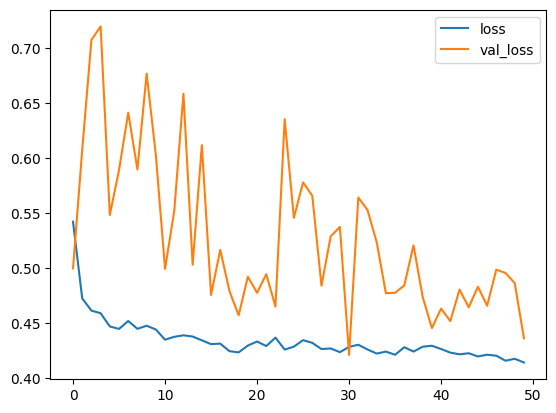

In [ ]:
history2_df = pd.DataFrame(history2.history)
history2_df.loc[0: , ['loss', 'val_loss']].plot()

In [ ]:
#Make predictions
y_predictions_hyper= np.argmax(hyper_model2.predict(X_test_transformed_df), axis =1)
accuracy_score = metrics.accuracy_score(y_test_transformed_df, y_predictions_hyper)
#precision_score = metrics.precision_score(y_test_transformed_df, y_predictions_new)
#sensitivity = metrics .recall_score(y_test_transformed_df, y_predictions_new, pos_label = 1)
#specificity= metrics .recall_score(y_test_transformed_df, y_predictions_new, pos_label = 0)
#f1_score = metrics.f1_score(y_test_transformed_df, y_predictions_new)
print('Accuracy score :', accuracy_score)
#print('Precision score :', precision_score)
#print('Sensitivity score :', sensitivity)
#print('Specificity score :', specificity)
#print('F1 score :', f1_score)

50/50 [==============================] - 0s 4ms/step
Accuracy score : 0.7692797960484385


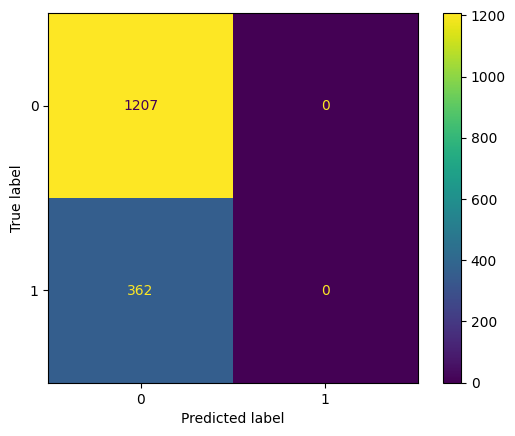

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classfication_report 
#Confusion matrix
confusion_matrix = confusion_matrix(y_test_transformed_df, y_predictions_hyper)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
confusion_matrix_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report 
y_predictions_hyper= hyper_model2.predict(X_test_transformed_df)
#Convert predictions into boolean values 
y_predictions_bool = (y_predictions_hyper >= 0.5) * 1
print(classification_report(y_test_transformed_df, y_predictions_bool))

50/50 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1207
           1       0.60      0.70      0.65       362

    accuracy                           0.82      1569
   macro avg       0.75      0.78      0.76      1569
weighted avg       0.83      0.82      0.83      1569



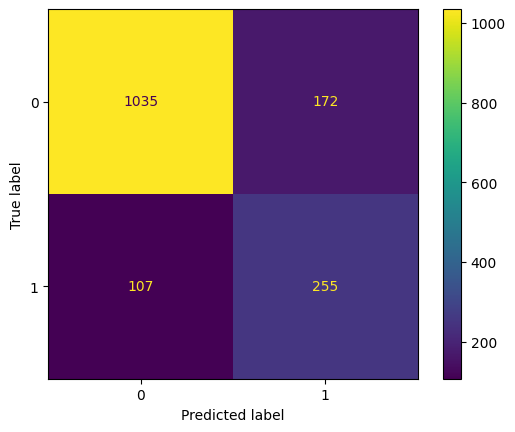

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix 
#Confusion matrix
confusion_matrix2 = confusion_matrix(y_test_transformed_df, y_predictions_bool)
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2)
confusion_matrix_display.plot()
plt.show()

In [ ]:
#Select best numerical features 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# Selecting numerical features from data 
X_num = X[num_columns]
num_fs = SelectKBest(score_func=f_classif, k = 'all')
num_fs.fit(X_num, y)
X_num_fs = num_fs.transform(X_num)


In [ ]:
print(num_fs)

SelectKBest(k='all')


In [ ]:
#view the scores
for i in range(len(num_fs.scores_)):
  print(i, num_fs.scores_[i])


0 35.41009486354761
1 20.799302965692398
2 95.85318499508536
3 49.403215323425975
4 1.099567251921703
5 1068.615039964832
6 72.14206214475851
7 183.87486284370374
8 1.2024094834709806
9 149.50819157580725


In [ ]:
#Numerical columns to drop 
index = [4, 8]
num_columns_drop = num_columns[index]
print(num_columns_drop)

Index(['contact', 'previous'], dtype='object')


In [ ]:
#drop_cols = ['minmaxscaler__contact', 'minmaxscaler__previous']
drop_cols = ['minmaxscaler__contact', 'minmaxscaler__previous'] 
X_train_resampled_fs_df = X_train_resampled_df.drop(drop_cols, axis = 1)
X_test_transformed_fs_df = X_test_transformed_df.drop(drop_cols, axis = 1)

In [ ]:
#Model training -selected features 
input_shape = len(X_train_resampled_fs_df.columns)
model_fs = keras.Sequential([layers.Dense(units = 520, input_shape = [input_shape] , activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units =24, activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units = 752, activation = 'relu'),
                        layers.Dropout(rate = 0.5),
                        layers.Dense(units = 1, activation = 'sigmoid')])
#Compile the model
optimizer = keras.optimizers.Adam(learning_rate = 0.01 )
model_fs.compile(optimizer = optimizer , loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fit the the model 
early_stopping = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3) 
history_fs = model_fs.fit(X_train_resampled_fs_df, y_train_resampled_df,
          validation_split = 0.20,
          epochs  = 500,
          batch_size = 100,
          )
#Evaluate the model
model_fs.evaluate(X_test_transformed_fs_df, y_test_transformed_df) 

Epoch 1/500
78/78 [==============================] - 2s 12ms/step - loss: 0.5780 - accuracy: 0.7004 - val_loss: 0.6971 - val_accuracy: 0.6485
Epoch 2/500
78/78 [==============================] - 1s 10ms/step - loss: 0.5057 - accuracy: 0.7645 - val_loss: 0.5586 - val_accuracy: 0.6851
Epoch 3/500
78/78 [==============================] - 1s 9ms/step - loss: 0.4958 - accuracy: 0.7774 - val_loss: 0.5695 - val_accuracy: 0.6845
Epoch 4/500
78/78 [==============================] - 1s 9ms/step - loss: 0.4833 - accuracy: 0.7824 - val_loss: 0.5043 - val_accuracy: 0.7521
Epoch 5/500
78/78 [==============================] - 1s 9ms/step - loss: 0.4724 - accuracy: 0.7873 - val_loss: 0.4366 - val_accuracy: 0.7619
Epoch 6/500
78/78 [==============================] - 1s 9ms/step - loss: 0.4607 - accuracy: 0.7952 - val_loss: 0.4124 - val_accuracy: 0.7876
Epoch 7/500
78/78 [==============================] - 1s 9ms/step - loss: 0.4758 - accuracy: 0.7900 - val_loss: 0.4551 - val_accuracy: 0.7510
Epoch 8/500

[0.6468731760978699, 0.8221797347068787]

In [ ]:
#Categorical features 
history_fs_df = pd.DataFrame(history_fs.history)


In [ ]:
from sklearn.metrics import classification_report 
y_predictions_fs= model_fs.predict(X_test_transformed_fs_df)
#Convert predictions into boolean values 
y_predictions_bool_fs = (y_predictions_fs >= 0.5) * 1
print(classification_report(y_test_transformed_df, y_predictions_bool_fs))


50/50 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1207
           1       0.62      0.65      0.64       362

    accuracy                           0.83      1569
   macro avg       0.76      0.77      0.76      1569
weighted avg       0.83      0.83      0.83      1569



In [ ]:
#Get best epoch for selected featues
val_accuracy_per_epoch_fs = history_fs.history['val_accuracy'] 
best_epoch_fs =val_accuracy_per_epoch_fs.index(max(val_accuracy_per_epoch_fs)) + 1
print('Best epoch for selected features : ', best_epoch_fs)

Best epoch for selected features :  142


In [ ]:
#Retrain model using selected features and best epoch
history_fs2 = model_fs.fit(X_train_resampled_fs_df, y_train_resampled_df,
          validation_split = 0.20,
          epochs  = best_epoch_fs,
          batch_size = 100,
          )
#Evaluate the model
model_fs.evaluate(X_test_transformed_fs_df, y_test_transformed_df) 

Epoch 1/142
78/78 [==============================] - 1s 10ms/step - loss: 0.4408 - accuracy: 0.8055 - val_loss: 0.5591 - val_accuracy: 0.7562
Epoch 2/142
78/78 [==============================] - 1s 9ms/step - loss: 0.4392 - accuracy: 0.8033 - val_loss: 0.5890 - val_accuracy: 0.6582
Epoch 3/142
78/78 [==============================] - 1s 9ms/step - loss: 0.4384 - accuracy: 0.8043 - val_loss: 0.5462 - val_accuracy: 0.7495
Epoch 4/142
78/78 [==============================] - 1s 9ms/step - loss: 0.4270 - accuracy: 0.8115 - val_loss: 0.6157 - val_accuracy: 0.6907
Epoch 5/142
78/78 [==============================] - 1s 10ms/step - loss: 0.4260 - accuracy: 0.8131 - val_loss: 0.4923 - val_accuracy: 0.7536
Epoch 6/142
78/78 [==============================] - 1s 10ms/step - loss: 0.4331 - accuracy: 0.8041 - val_loss: 0.5438 - val_accuracy: 0.7804
Epoch 7/142
78/78 [==============================] - 1s 10ms/step - loss: 0.4374 - accuracy: 0.8059 - val_loss: 0.5778 - val_accuracy: 0.7211
Epoch 8/1

[1.6948686838150024, 0.8202676773071289]